Logistic Regression
k-Nearest Neighbors
Decision Trees
Support Vector Machine
Naive Bayes

I suppose we build the model from scratch?
Do we need to preprocess the data? Are there some highly correlated variables?
feature selection.
SVM 


In [27]:
import numpy as np
import pandas as pd
import scipy
import sklearn as sk
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from mlxtend.plotting import plot_decision_regions

df = pd.read_csv("npf_train.csv")
df
df = df.set_index("date")

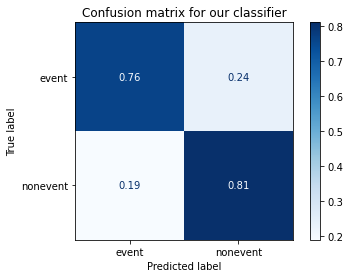

[[5.00000000e+01 0.00000000e+00 3.60618000e+02 ... 2.81223044e-01
  5.19527976e-03 1.19901234e-03]
 [4.10000000e+02 0.00000000e+00 3.81465904e+02 ... 9.36350227e-01
  5.73921034e-03 6.15564061e-04]
 [1.36000000e+02 0.00000000e+00 3.66138171e+02 ... 6.77657907e-01
  3.61651111e-03 1.28740178e-03]
 ...
 [1.78000000e+02 0.00000000e+00 3.65859581e+02 ... 7.28718902e-01
  5.28730696e-03 4.44737049e-04]
 [4.05000000e+02 0.00000000e+00 3.90094967e+02 ... 4.58378656e-01
  4.33793935e-03 1.88840283e-03]
 [3.60000000e+02 0.00000000e+00 3.81123937e+02 ... 3.41716681e-01
  3.03757595e-03 1.24416938e-03]]


NameError: name 'y_pred' is not defined

In [28]:
class2 = np.array(["event"]*df.shape[0],dtype="object")
class2[df["class4"]=="nonevent"] = "nonevent"
df["class2"] = class2
df["class2"] = df["class2"].astype("category")

y = df.class2
X = df.drop(["class2", "class4"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Predict the test set
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Generate confusion matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

# Get support vectors
support_vectors = clf.support_vectors_
print(support_vectors)
print("accuracy_score: ", accuracy_score(y_test, y_pred))
# Visualize support vectors
# plt.scatter(X_train[:,0], X_train[:,1])
# plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
# plt.title('Linearly separable data with support vectors')
# plt.xlabel('X1')
# plt.ylabel('X2')
# plt.show()
# plot_decision_regions(X_test, y_test, clf=clf, legend=2)
# plt.show()